**Tim Cordero IST 718 Project**:<br/>Coffee Bean Analysis<br>
9/19/2022

In [54]:
#Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import time
from sklearn import metrics

In [55]:
############
#Obtain
############

# Arabica Data
arabica_beans = pd.read_csv("arabica_data_cleaned.csv")
arabica_beans = arabica_beans.set_index("ID")
print("Arabica Data\n")
arabica_beans.head()

Arabica Data



,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
ID,,,,,,,,,,,,,,,,,,,,,
1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,NaN,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,oromia,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [56]:
#Arabica Ratings
arabica_ratings = pd.read_csv("arabica_ratings_raw.csv")
arabica_ratings = arabica_ratings.set_index("ID")
print("Arabica Ratings\n")
arabica_ratings.head()

Arabica Ratings



,quality_score,view_certificate_1,view_certificate_2,Cupping Protocol and Descriptors,View Green Analysis Details,Request a Sample,Species,Owner,Country of Origin,Farm Name,...,Quakers,Color,Category Two Defects,NA.3,Expiration,Certification Body,Certification Address,Certification Contact,Unnamed: 51,Notes
ID,,,,,,,,,,,,,,,,,,,,,
1,90.58,NaN,NaN,NaN,NaN,NaN,Arabica,metad plc,Ethiopia,METAD PLC,...,0.0,Green,0 full defects,NaN,"April 3rd, 2016",METAD Agricultural Development plc,"BAWA Center, 3rd Floor (Gerji), Addis Ababa, E...","Aman Adinew (Emebet Dinku) - +251-116-292534, ...",NaN,NaN
2,89.92,NaN,NaN,NaN,NaN,NaN,Arabica,metad plc,Ethiopia,METAD PLC,...,0.0,Green,1 full defects,NaN,"April 3rd, 2016",METAD Agricultural Development plc,"BAWA Center, 3rd Floor (Gerji), Addis Ababa, E...","Aman Adinew (Emebet Dinku) - +251-116-292534, ...",NaN,NaN
3,89.75,NaN,NaN,NaN,NaN,NaN,Arabica,Grounds for Health Admin,Guatemala,"San Marcos Barrancas ""San Cristobal Cuch",...,0.0,NaN,0 full defects,NaN,"May 31st, 2011",Specialty Coffee Association,"117 W 4th St, Suite 300 Santa Ana, CA 92701",Chris Buck - (562) 624-4100,NaN,NaN
4,89.00,NaN,NaN,NaN,NaN,NaN,Arabica,Yidnekachew Dabessa,Ethiopia,Yidnekachew Dabessa Coffee Plantation,...,0.0,Green,2 full defects,NaN,"March 25th, 2016",METAD Agricultural Development plc,"BAWA Center, 3rd Floor (Gerji), Addis Ababa, E...","Aman Adinew (Emebet Dinku) - +251-116-292534, ...",NaN,NaN
5,88.83,NaN,NaN,NaN,NaN,NaN,Arabica,metad plc,Ethiopia,METAD PLC,...,0.0,Green,2 full defects,NaN,"April 3rd, 2016",METAD Agricultural Development plc,"BAWA Center, 3rd Floor (Gerji), Addis Ababa, E...","Aman Adinew (Emebet Dinku) - +251-116-292534, ...",NaN,NaN


In [57]:
#Robusta Data
robusta_beans = pd.read_csv("robusta_data_cleaned.csv")
robusta_beans["ID"] = robusta_beans["ID"] + 1311
robusta_beans = robusta_beans.set_index("ID")
print("Robusta Data\n")
robusta_beans.head()

Robusta Data



,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
ID,,,,,,,,,,,,,,,,,,,,,
1312,Robusta,ankole coffee producers coop,Uganda,kyangundu cooperative society,NaN,ankole coffee producers,0,ankole coffee producers coop,1488,sheema south western,...,Green,2,"June 26th, 2015",Uganda Coffee Development Authority,e36d0270932c3b657e96b7b0278dfd85dc0fe743,03077a1c6bac60e6f514691634a7f6eb5c85aae8,m,1488.0,1488.0,1488.0
1313,Robusta,nishant gurjer,India,sethuraman estate kaapi royale,25,sethuraman estate,14/1148/2017/21,kaapi royale,3170,chikmagalur karnataka indua,...,NaN,2,"October 31st, 2018",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,3170.0,3170.0,3170.0
1314,Robusta,andrew hetzel,India,sethuraman estate,NaN,NaN,0,sethuraman estate,1000m,chikmagalur,...,Green,0,"April 29th, 2016",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,1000.0,1000.0,1000.0
1315,Robusta,ugacof,Uganda,ugacof project area,NaN,ugacof,0,ugacof ltd,1212,central,...,Green,7,"July 14th, 2015",Uganda Coffee Development Authority,e36d0270932c3b657e96b7b0278dfd85dc0fe743,03077a1c6bac60e6f514691634a7f6eb5c85aae8,m,1212.0,1212.0,1212.0
1316,Robusta,katuka development trust ltd,Uganda,katikamu capca farmers association,NaN,katuka development trust,0,katuka development trust ltd,1200-1300,luwero central region,...,Green,3,"June 26th, 2015",Uganda Coffee Development Authority,e36d0270932c3b657e96b7b0278dfd85dc0fe743,03077a1c6bac60e6f514691634a7f6eb5c85aae8,m,1200.0,1300.0,1250.0


In [58]:
#Robusta Ratings
robusta_ratings = pd.read_csv("robusta_ratings_raw.csv")
robusta_ratings["ID"] = robusta_ratings["ID"] + 1311
robusta_ratings = robusta_ratings.set_index("ID")
print("Robusta Ratings\n")
robusta_ratings.head()

Robusta Ratings



,quality_score,view_certificate_1,view_certificate_2,Cupping Protocol and Descriptors,View Green Analysis Details,Request a Sample,Species,Owner,Country of Origin,Farm Name,...,Moisture,Category One Defects,Quakers,Color,Category Two Defects,NA.3,Expiration,Certification Body,Certification Address,Certification Contact
ID,,,,,,,,,,,,,,,,,,,,,
1312,83.75,NaN,NaN,NaN,NaN,NaN,Robusta,Ankole coffee producers coop,Uganda,Kyangundu cooperative society,...,12%,0 full defects,0,Green,2 full defects,NaN,"June 26th, 2015",Uganda Coffee Development Authority,"Coffee House, Plot 35, Jinja Road, P.O. Box 72...",Clare Rwakatogoro - 256-41-256940/233073
1313,83.50,NaN,NaN,NaN,NaN,NaN,Robusta,Nishant Gurjer,India,Sethuraman Estate Kaapi Royale,...,0%,0 full defects,0,NaN,2 full defects,NaN,"October 31st, 2018",Specialty Coffee Association,"117 W 4th St, Suite 300 Santa Ana, CA 92701",Chris Buck - (562) 624-4100
1314,83.25,NaN,NaN,NaN,NaN,NaN,Robusta,Andrew Hetzel,India,Sethuraman Estate,...,0%,0 full defects,0,Green,0 full defects,NaN,"April 29th, 2016",Specialty Coffee Association,"117 W 4th St, Suite 300 Santa Ana, CA 92701",Chris Buck - (562) 624-4100
1315,83.00,NaN,NaN,NaN,NaN,NaN,Robusta,UGACOF,Uganda,UGACOF project area,...,12%,0 full defects,0,Green,7 full defects,NaN,"July 14th, 2015",Uganda Coffee Development Authority,"Coffee House, Plot 35, Jinja Road, P.O. Box 72...",Clare Rwakatogoro - 256-41-256940/233073
1316,83.00,NaN,NaN,NaN,NaN,NaN,Robusta,Katuka Development Trust Ltd,Uganda,Katikamu capca farmers association,...,12%,0 full defects,0,Green,3 full defects,NaN,"June 26th, 2015",Uganda Coffee Development Authority,"Coffee House, Plot 35, Jinja Road, P.O. Box 72...",Clare Rwakatogoro - 256-41-256940/233073


In [59]:
##########
#Scrub
##########

#Join Arabica Dataframes
print("Data length:", len(arabica_beans))
print("Ratings length:", len(arabica_ratings))
# ratings has extra record, dropping because no corresponding bean data
arabica_ratings = arabica_ratings.drop(index=[1312])
print("Data length:", len(arabica_beans))
print("Ratings length:", len(arabica_ratings))

arabica = pd.merge(arabica_beans ,arabica_ratings, on=[arabica_beans.index, arabica_ratings.index], how="left")
arabica.head()

Data length: 1311
Ratings length: 1312
Data length: 1311
Ratings length: 1311


,key_0,key_1,Species_x,Owner_x,Country.of.Origin,Farm.Name,Lot.Number,Mill_x,ICO.Number,Company_x,...,Quakers_y,Color_y,Category Two Defects,NA.3,Expiration_y,Certification Body,Certification Address,Certification Contact,Unnamed: 51,Notes
0,1,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,...,0.0,Green,0 full defects,NaN,"April 3rd, 2016",METAD Agricultural Development plc,"BAWA Center, 3rd Floor (Gerji), Addis Ababa, E...","Aman Adinew (Emebet Dinku) - +251-116-292534, ...",NaN,NaN
1,2,2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,...,0.0,Green,1 full defects,NaN,"April 3rd, 2016",METAD Agricultural Development plc,"BAWA Center, 3rd Floor (Gerji), Addis Ababa, E...","Aman Adinew (Emebet Dinku) - +251-116-292534, ...",NaN,NaN
2,3,3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,...,0.0,NaN,0 full defects,NaN,"May 31st, 2011",Specialty Coffee Association,"117 W 4th St, Suite 300 Santa Ana, CA 92701",Chris Buck - (562) 624-4100,NaN,NaN
3,4,4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,...,0.0,Green,2 full defects,NaN,"March 25th, 2016",METAD Agricultural Development plc,"BAWA Center, 3rd Floor (Gerji), Addis Ababa, E...","Aman Adinew (Emebet Dinku) - +251-116-292534, ...",NaN,NaN
4,5,5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,...,0.0,Green,2 full defects,NaN,"April 3rd, 2016",METAD Agricultural Development plc,"BAWA Center, 3rd Floor (Gerji), Addis Ababa, E...","Aman Adinew (Emebet Dinku) - +251-116-292534, ...",NaN,NaN


In [60]:
arabica.columns

Index(['key_0', 'key_1', 'Species_x', 'Owner_x', 'Country.of.Origin',
       'Farm.Name', 'Lot.Number', 'Mill_x', 'ICO.Number', 'Company_x',
       'Altitude_x', 'Region_x', 'Producer_x', 'Number.of.Bags', 'Bag.Weight',
       'In.Country.Partner', 'Harvest.Year', 'Grading.Date', 'Owner.1_x',
       'Variety_x', 'Processing.Method', 'Aroma_x', 'Flavor_x', 'Aftertaste_x',
       'Acidity_x', 'Body_x', 'Balance_x', 'Uniformity_x', 'Clean.Cup',
       'Sweetness_x', 'Cupper.Points', 'Total.Cup.Points', 'Moisture_x',
       'Category.One.Defects', 'Quakers_x', 'Color_x', 'Category.Two.Defects',
       'Expiration_x', 'Certification.Body', 'Certification.Address',
       'Certification.Contact', 'unit_of_measurement', 'altitude_low_meters',
       'altitude_high_meters', 'altitude_mean_meters', 'quality_score',
       'view_certificate_1', 'view_certificate_2',
       'Cupping Protocol and Descriptors', 'View Green Analysis Details',
       'Request a Sample', 'Species_y', 'Owner_y', 'Count

In [61]:
#Drop duplicate columns from datasets
arabica.drop(["key_1", "Species_y", "Owner_y", "Mill_y", "Company_y", "Altitude_y", "Region_y", "Producer_y", "Owner.1_y", "Variety_y", "Aroma_y", "Flavor_y", "Aftertaste_y", "Acidity_y", "Body_y", "Balance_y", "Uniformity_y", "Sweetness_y", "Moisture_y", "Quakers_y", "Color_y", "Expiration_y" ], axis=1, inplace=True)
arabica.head()

,key_0,Species_x,Owner_x,Country.of.Origin,Farm.Name,Lot.Number,Mill_x,ICO.Number,Company_x,Altitude_x,...,Total Cup Points,NA.2,Category One Defects,Category Two Defects,NA.3,Certification Body,Certification Address,Certification Contact,Unnamed: 51,Notes
0,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Sample 90.58,NaN,0 full defects,0 full defects,NaN,METAD Agricultural Development plc,"BAWA Center, 3rd Floor (Gerji), Addis Ababa, E...","Aman Adinew (Emebet Dinku) - +251-116-292534, ...",NaN,NaN
1,2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Sample 89.92,NaN,0 full defects,1 full defects,NaN,METAD Agricultural Development plc,"BAWA Center, 3rd Floor (Gerji), Addis Ababa, E...","Aman Adinew (Emebet Dinku) - +251-116-292534, ...",NaN,NaN
2,3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,Sample 89.75,NaN,0 full defects,0 full defects,NaN,Specialty Coffee Association,"117 W 4th St, Suite 300 Santa Ana, CA 92701",Chris Buck - (562) 624-4100,NaN,NaN
3,4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Sample 89.00,NaN,0 full defects,2 full defects,NaN,METAD Agricultural Development plc,"BAWA Center, 3rd Floor (Gerji), Addis Ababa, E...","Aman Adinew (Emebet Dinku) - +251-116-292534, ...",NaN,NaN
4,5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Sample 88.83,NaN,0 full defects,2 full defects,NaN,METAD Agricultural Development plc,"BAWA Center, 3rd Floor (Gerji), Addis Ababa, E...","Aman Adinew (Emebet Dinku) - +251-116-292534, ...",NaN,NaN


In [62]:
#Join Robusta Dataframes

robusta = pd.merge(robusta_beans ,robusta_ratings, on=[robusta_beans.index, robusta_ratings.index], how="left")
robusta.head()

,key_0,key_1,Species_x,Owner_x,Country.of.Origin,Farm.Name,Lot.Number,Mill_x,ICO.Number,Company_x,...,Moisture_y,Category One Defects,Quakers_y,Color_y,Category Two Defects,NA.3,Expiration_y,Certification Body,Certification Address,Certification Contact
0,1312,1312,Robusta,ankole coffee producers coop,Uganda,kyangundu cooperative society,NaN,ankole coffee producers,0,ankole coffee producers coop,...,12%,0 full defects,0,Green,2 full defects,NaN,"June 26th, 2015",Uganda Coffee Development Authority,"Coffee House, Plot 35, Jinja Road, P.O. Box 72...",Clare Rwakatogoro - 256-41-256940/233073
1,1313,1313,Robusta,nishant gurjer,India,sethuraman estate kaapi royale,25,sethuraman estate,14/1148/2017/21,kaapi royale,...,0%,0 full defects,0,NaN,2 full defects,NaN,"October 31st, 2018",Specialty Coffee Association,"117 W 4th St, Suite 300 Santa Ana, CA 92701",Chris Buck - (562) 624-4100
2,1314,1314,Robusta,andrew hetzel,India,sethuraman estate,NaN,NaN,0,sethuraman estate,...,0%,0 full defects,0,Green,0 full defects,NaN,"April 29th, 2016",Specialty Coffee Association,"117 W 4th St, Suite 300 Santa Ana, CA 92701",Chris Buck - (562) 624-4100
3,1315,1315,Robusta,ugacof,Uganda,ugacof project area,NaN,ugacof,0,ugacof ltd,...,12%,0 full defects,0,Green,7 full defects,NaN,"July 14th, 2015",Uganda Coffee Development Authority,"Coffee House, Plot 35, Jinja Road, P.O. Box 72...",Clare Rwakatogoro - 256-41-256940/233073
4,1316,1316,Robusta,katuka development trust ltd,Uganda,katikamu capca farmers association,NaN,katuka development trust,0,katuka development trust ltd,...,12%,0 full defects,0,Green,3 full defects,NaN,"June 26th, 2015",Uganda Coffee Development Authority,"Coffee House, Plot 35, Jinja Road, P.O. Box 72...",Clare Rwakatogoro - 256-41-256940/233073


In [63]:
robusta.columns

Index(['key_0', 'key_1', 'Species_x', 'Owner_x', 'Country.of.Origin',
       'Farm.Name', 'Lot.Number', 'Mill_x', 'ICO.Number', 'Company_x',
       'Altitude_x', 'Region_x', 'Producer_x', 'Number.of.Bags', 'Bag.Weight',
       'In.Country.Partner', 'Harvest.Year', 'Grading.Date', 'Owner.1_x',
       'Variety_x', 'Processing.Method', 'Aroma_x', 'Flavor_x', 'Aftertaste_x',
       'Acidity_x', 'Sweetness_x', 'Body_x', 'Uniformity_x', 'Clean.Cup',
       'Balance_x', 'Cupper.Points', 'Total.Cup.Points', 'Moisture_x',
       'Category.One.Defects', 'Quakers_x', 'Color_x', 'Category.Two.Defects',
       'Expiration_x', 'Certification.Body', 'Certification.Address',
       'Certification.Contact', 'unit_of_measurement', 'altitude_low_meters',
       'altitude_high_meters', 'altitude_mean_meters', 'quality_score',
       'view_certificate_1', 'view_certificate_2',
       'Cupping Protocol and Descriptors', 'View Green Analysis Details',
       'Request a Sample', 'Species_y', 'Owner_y', 'Count

In [64]:
#Drop duplicate columns from datasets
robusta.drop(["key_1", "Species_y", "Owner_y", "Mill_y", "Company_y", "Altitude_y", "Region_y", "Producer_y", "Owner.1_y", "Variety_y", "Aroma_y", "Flavor_y", "Aftertaste_y", "Acidity_y", "Body_y", "Balance_y", "Uniformity_y", "Sweetness_y", "Moisture_y", "Quakers_y", "Color_y", "Expiration_y" ], axis=1, inplace=True)
robusta.head()

,key_0,Species_x,Owner_x,Country.of.Origin,Farm.Name,Lot.Number,Mill_x,ICO.Number,Company_x,Altitude_x,...,Clean Cup,Cupper Points,Total Cup Points,NA.2,Category One Defects,Category Two Defects,NA.3,Certification Body,Certification Address,Certification Contact
0,1312,Robusta,ankole coffee producers coop,Uganda,kyangundu cooperative society,NaN,ankole coffee producers,0,ankole coffee producers coop,1488,...,10.0,8.00,Sample 83.75,NaN,0 full defects,2 full defects,NaN,Uganda Coffee Development Authority,"Coffee House, Plot 35, Jinja Road, P.O. Box 72...",Clare Rwakatogoro - 256-41-256940/233073
1,1313,Robusta,nishant gurjer,India,sethuraman estate kaapi royale,25,sethuraman estate,14/1148/2017/21,kaapi royale,3170,...,10.0,8.00,Sample 83.50,NaN,0 full defects,2 full defects,NaN,Specialty Coffee Association,"117 W 4th St, Suite 300 Santa Ana, CA 92701",Chris Buck - (562) 624-4100
2,1314,Robusta,andrew hetzel,India,sethuraman estate,NaN,NaN,0,sethuraman estate,1000m,...,10.0,8.00,Sample 83.25,NaN,0 full defects,0 full defects,NaN,Specialty Coffee Association,"117 W 4th St, Suite 300 Santa Ana, CA 92701",Chris Buck - (562) 624-4100
3,1315,Robusta,ugacof,Uganda,ugacof project area,NaN,ugacof,0,ugacof ltd,1212,...,10.0,8.08,Sample 83.00,NaN,0 full defects,7 full defects,NaN,Uganda Coffee Development Authority,"Coffee House, Plot 35, Jinja Road, P.O. Box 72...",Clare Rwakatogoro - 256-41-256940/233073
4,1316,Robusta,katuka development trust ltd,Uganda,katikamu capca farmers association,NaN,katuka development trust,0,katuka development trust ltd,1200-1300,...,10.0,7.67,Sample 83.00,NaN,0 full defects,3 full defects,NaN,Uganda Coffee Development Authority,"Coffee House, Plot 35, Jinja Road, P.O. Box 72...",Clare Rwakatogoro - 256-41-256940/233073


In [65]:
arabica = arabica.set_index("key_0")
robusta = robusta.set_index("key_0")
coffee = arabica.append(robusta)
print(coffee.head())
print(coffee.tail())

      Species_x                   Owner_x Country.of.Origin  \
key_0                                                         
1       Arabica                 metad plc          Ethiopia   
2       Arabica                 metad plc          Ethiopia   
3       Arabica  grounds for health admin         Guatemala   
4       Arabica       yidnekachew dabessa          Ethiopia   
5       Arabica                 metad plc          Ethiopia   

                                      Farm.Name Lot.Number     Mill_x  \
key_0                                                                   
1                                     metad plc        NaN  metad plc   
2                                     metad plc        NaN  metad plc   
3      san marcos barrancas "san cristobal cuch        NaN        NaN   
4         yidnekachew dabessa coffee plantation        NaN    wolensu   
5                                     metad plc        NaN  metad plc   

      ICO.Number                              

In [66]:
############
#Explore
############
print("Arabica length:", len(coffee[coffee["Species_x"] == "Arabica"]))
print("Robista length:", len(coffee[coffee["Species_x"] == "Robusta"]))

Arabica length: 1311
Robista length: 28


In [68]:
#mean rating score for beans
print("{:.2f}".format(np.mean(coffee["quality_score"])))

82.12


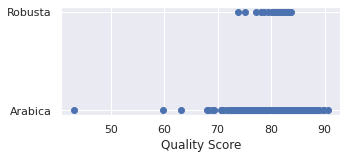

In [69]:
fig = plt.figure(figsize=(5, 2))
ax = plt.axes()
plt.sca(ax)
plt.scatter(
    x=coffee["quality_score"],
    y=coffee["Species_x"],
)
plt.xlabel("Quality Score")
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


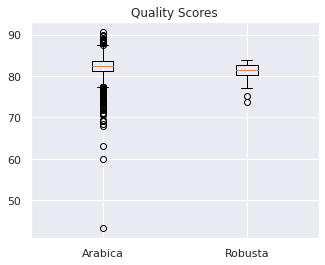

In [70]:
# better version of previous plot
fig = plt.figure(figsize =(4, 3))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot([coffee[coffee["Species_x"] == "Arabica"]["quality_score"], coffee[coffee["Species_x"] == "Robusta"]["quality_score"]])
ax.set_xticklabels(["Arabica", "Robusta"])
plt.title("Quality Scores")
# show plot
plt.show()

In [71]:
#Quality Scores by Country
country_pivot = pd.pivot_table(coffee, values="quality_score", index="Country.of.Origin", aggfunc='mean')
country_pivot

,quality_score
Country.of.Origin,
Brazil,82.405909
Burundi,81.830000
China,82.927500
Colombia,83.106557
Costa Rica,82.789020
Cote d?Ivoire,79.330000
Ecuador,80.220000
El Salvador,83.052857
Ethiopia,85.484091


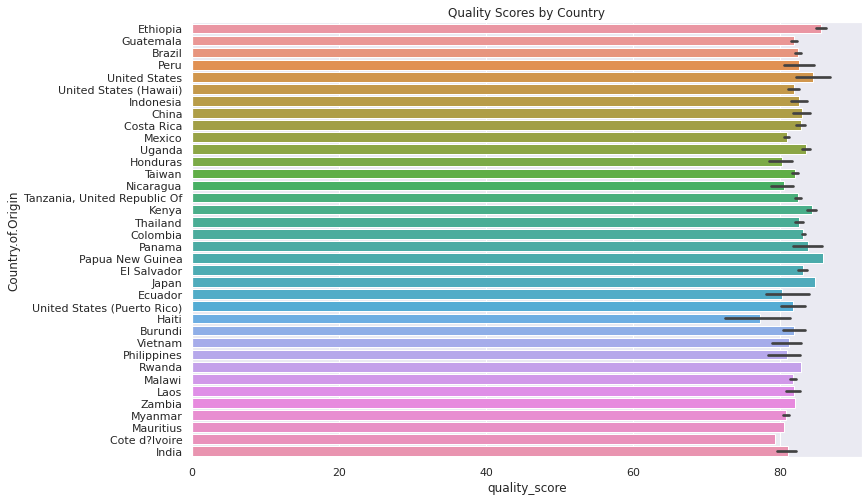

In [72]:
#Quality Scores by Country Bar Plot
sns.set(rc={'figure.figsize':(12,8)})
#sns.barplot(data=coffee, x="quality_score", y="Country.of.Origin", color="lightblue").set(title='Quality Scores by Country')
ax = sns.barplot(x='quality_score', y="Country.of.Origin" ,data=coffee).set(title='Quality Scores by Country')
plt.show()

In [73]:
#Quality Scores by Certification Body
country_pivot = pd.pivot_table(coffee, values="quality_score", index="Certification Body", aggfunc='mean')
country_pivot

,quality_score
Certification Body,
AMECAFE,80.822732
Africa Fine Coffee Association,82.349184
Almacafé,83.346011
Asociacion Nacional Del Café,81.652516
Asociación Mexicana De Cafés y Cafeterías De Especialidad A.C.,82.680000
Asociación de Cafés Especiales de Nicaragua,80.176250
Blossom Valley International,82.217414
Blossom Valley International\r\n,80.420000
Brazil Specialty Coffee Association,81.806119


[Text(0.5, 1.0, 'Quality Scores by Certification Body')]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


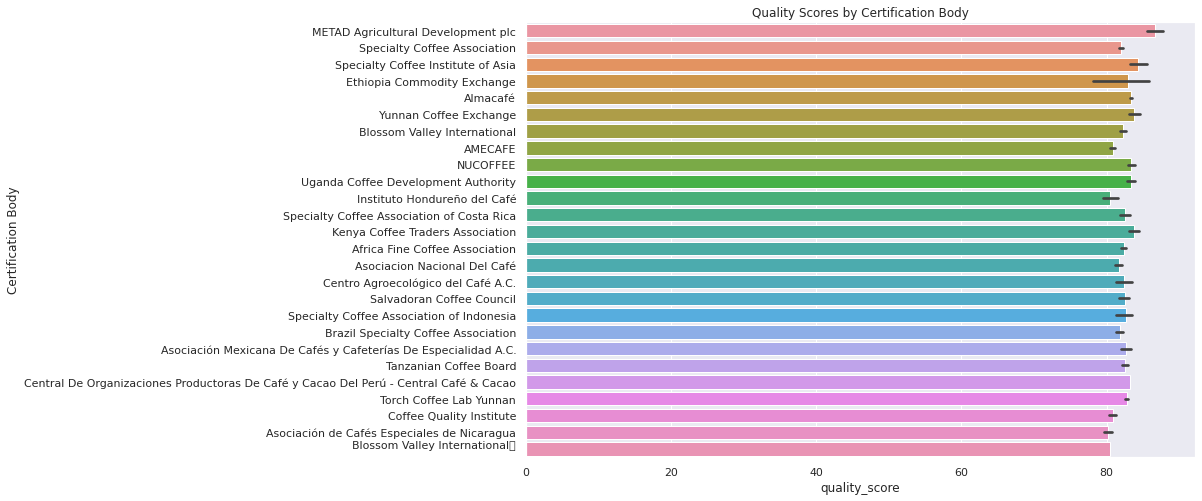

In [74]:
#Quality Scores by Certification Body Bar Plot
sns.set(rc={'figure.figsize':(12,8)})
sns.barplot(data=coffee, x="quality_score", y="Certification Body").set(title='Quality Scores by Certification Body')

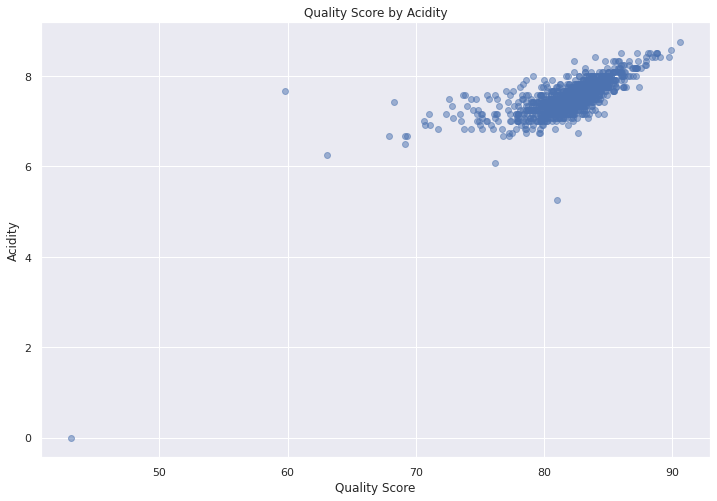

In [75]:
#Qulity Score by Acidity
#Acidity 1 out of 10 rating

plt.scatter(coffee["quality_score"], coffee["Acidity_x"], alpha=0.5)
plt.ylabel("Acidity")
plt.xlabel("Quality Score")
plt.title("Quality Score by Acidity")
plt.show()

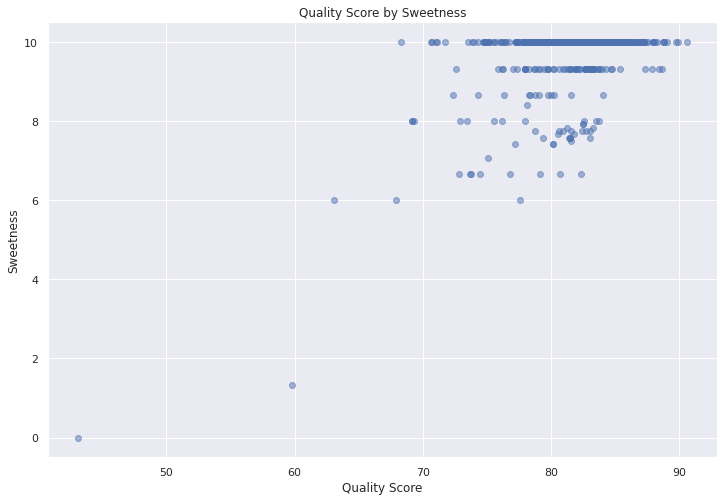

In [76]:
#Qulity Score by Sweetness
#Sweetness 1 out of 10 rating

plt.scatter(coffee["quality_score"], coffee["Sweetness_x"], alpha=0.5)
plt.ylabel("Sweetness")
plt.xlabel("Quality Score")
plt.title("Quality Score by Sweetness")
plt.show()

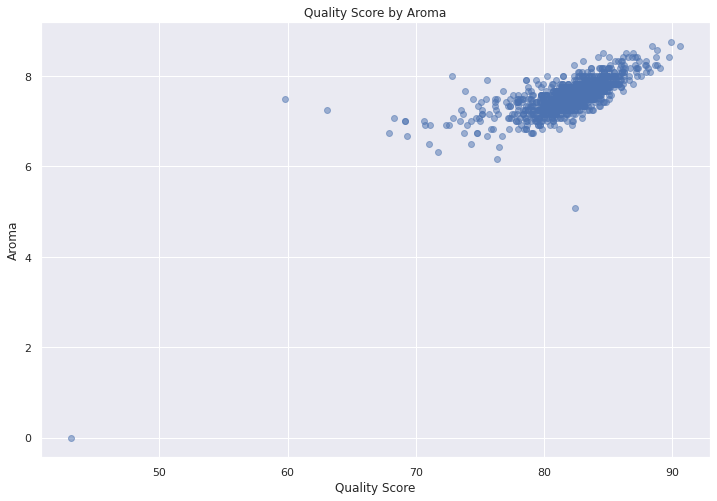

In [77]:
#Qulity Score by Aroma
#Aroma 1 out of 10 rating

plt.scatter(coffee["quality_score"], coffee["Aroma_x"], alpha=0.5)
plt.ylabel("Aroma")
plt.xlabel("Quality Score")
plt.title("Quality Score by Aroma")
plt.show()

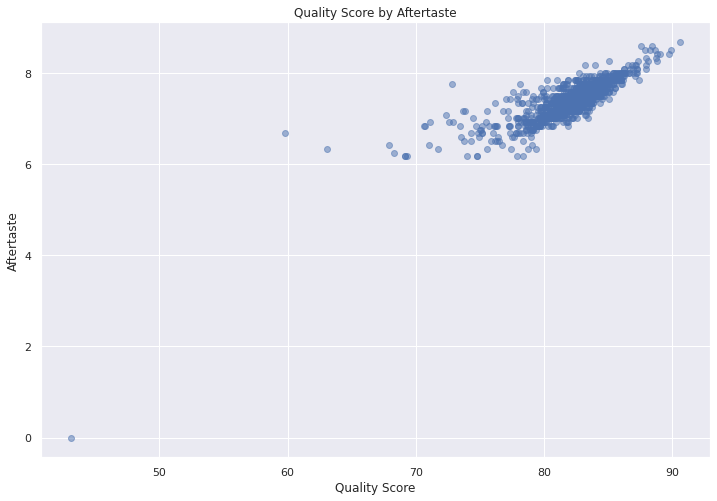

In [78]:
#Qulity Score by Aftertaste
#Aftertaste 1 out of 10 rating

plt.scatter(coffee["quality_score"], coffee["Aftertaste_x"], alpha=0.5)
plt.ylabel("Aftertaste")
plt.xlabel("Quality Score")
plt.title("Quality Score by Aftertaste")
plt.show()

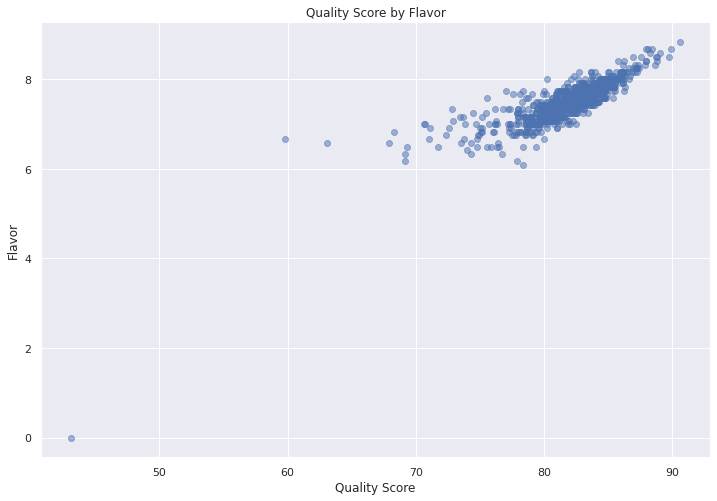

In [79]:
#Qulity Score by Flavor
#Flavor 1 out of 10 rating

plt.scatter(coffee["quality_score"], coffee["Flavor_x"], alpha=0.5)
plt.ylabel("Flavor")
plt.xlabel("Quality Score")
plt.title("Quality Score by Flavor")
plt.show()

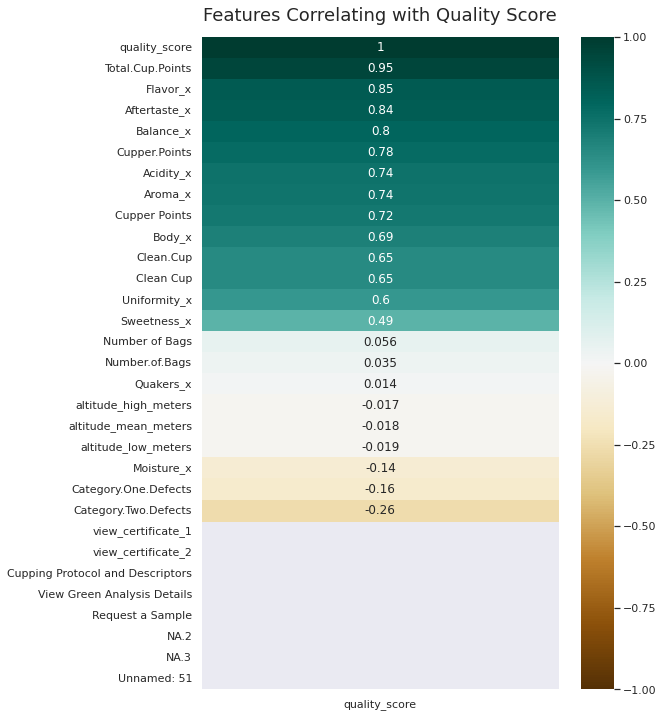

In [80]:
#Coffee Data Correlation
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(coffee.corr()[['quality_score']].sort_values(by='quality_score', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Quality Score', fontdict={'fontsize':18}, pad=16);

Dependent Variable: Quality Score
Independent Variable: Flavor




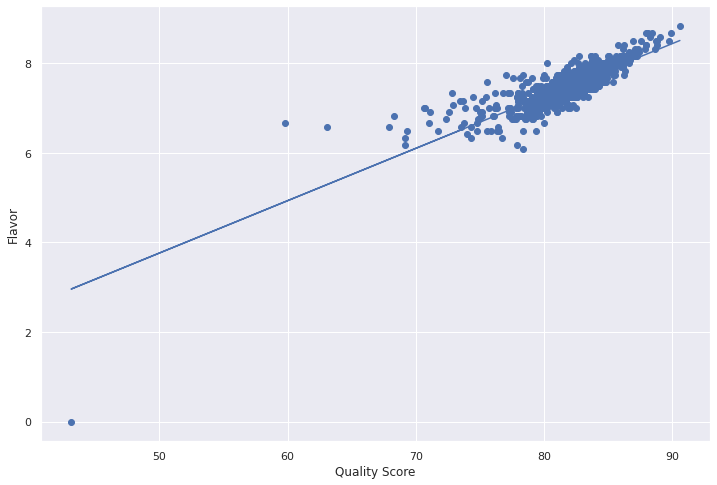

In [81]:
##########
#Model
##########
print("Dependent Variable: Quality Score\nIndependent Variable: Flavor\n\n")
slope, intercept, r, p, std_err = stats.linregress(coffee["quality_score"], coffee["Flavor_x"])

def regression(x):
  return slope * x + intercept

mymodel = list(map(regression, coffee["quality_score"]))

plt.scatter(coffee["quality_score"], coffee["Flavor_x"])
plt.plot(coffee["quality_score"], mymodel)
plt.xlabel("Quality Score")
plt.ylabel("Flavor")
plt.show()

In [82]:
#OLS using most correlated field: Flavor
#training and test data
train = coffee[:900]
test = coffee[900:]

# model with all predictors included
my_model = str('quality_score ~ Flavor_x')

# fit the model to the training set
train_model_fit = smf.ols(my_model, data = train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())
# training set predictions from the model fit to the training set
#coffee['predict_score'] = train_model_fit.fittedvalues

# test set predictions from the model fit to the training set
#coffee['predict_score'] = train_model_fit.predict(test)

#Ordinary Least Squares model accounts for 69% variability in the data

                            OLS Regression Results                            
Dep. Variable:          quality_score   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     2018.
Date:                Mon, 19 Sep 2022   Prob (F-statistic):          6.76e-232
Time:                        18:12:10   Log-Likelihood:                -1030.6
No. Observations:                 900   AIC:                             2065.
Df Residuals:                     898   BIC:                             2075.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     47.5081      0.801     59.331      0.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


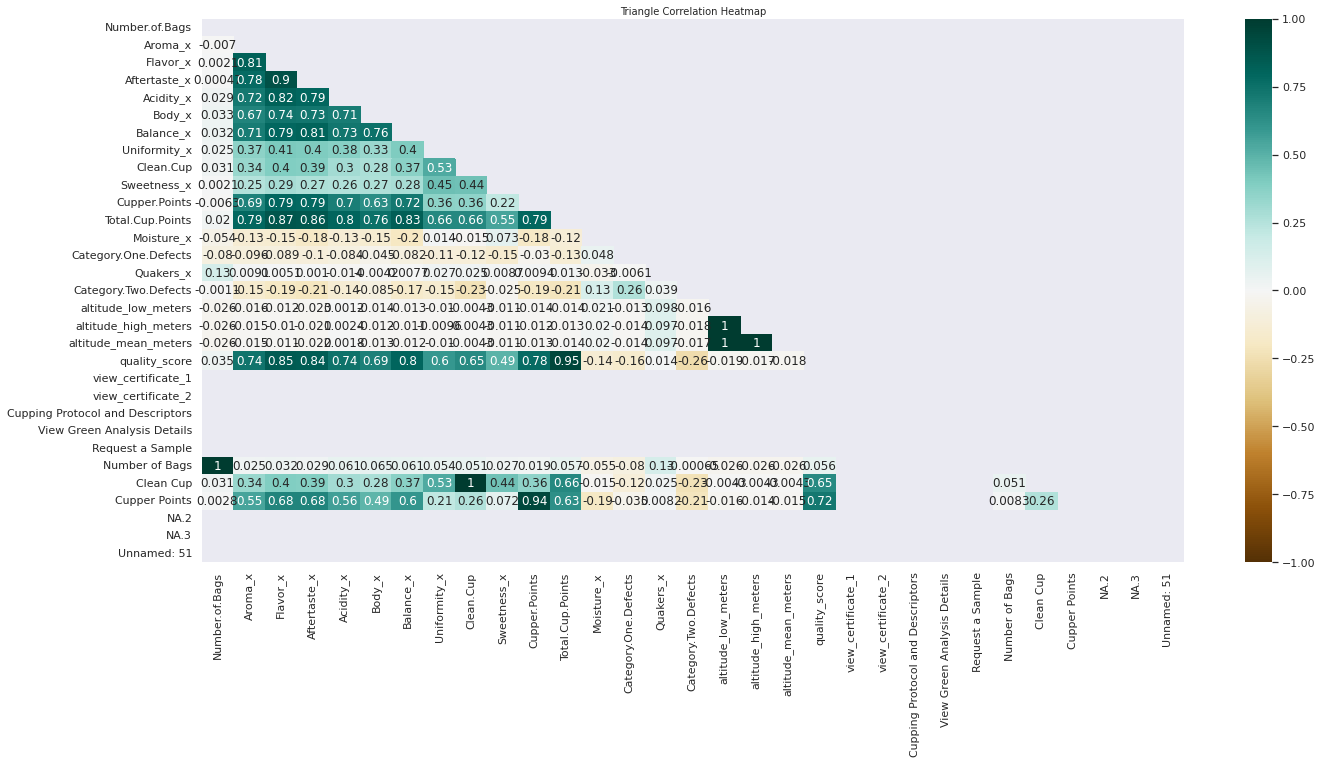

In [83]:
plt.figure(figsize=(22, 10))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(coffee.corr(), dtype=np.bool))
heatmap = sns.heatmap(coffee.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':10}, pad=4);

In [84]:
#OLS using mix of fields: Flavor, Balance, and Uniformity

# model with all predictors included
my_model = str('quality_score ~ Flavor_x + Balance_x + Uniformity_x')

olsStartTime = time.time()

# fit the model to the training set
train_model_fit = smf.ols(my_model, data = train).fit()

olsEndTime = time.time()
olsTotal_time = olsEndTime - olsStartTime

# summary of model fit to the training set
print(train_model_fit.summary())
# training set predictions from the model fit to the training set
#coffee['predict_score'] = train_model_fit.fittedvalues

# test set predictions from the model fit to the training set
#coffee['predict_score'] = train_model_fit.predict(test)

#Ordinary Least Squares model accounts for 81% variability in the data

                            OLS Regression Results                            
Dep. Variable:          quality_score   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1287.
Date:                Mon, 19 Sep 2022   Prob (F-statistic):          4.94e-324
Time:                        18:12:20   Log-Likelihood:                -809.35
No. Observations:                 900   AIC:                             1627.
Df Residuals:                     896   BIC:                             1646.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       26.9632      1.304     20.673   

0.25    81.08
0.50    82.50
0.75    83.67
Name: quality_score, dtype: float64


(array([499.,   0.,   0.,   0.,   0., 504.,   0.,   0.,   0., 336.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

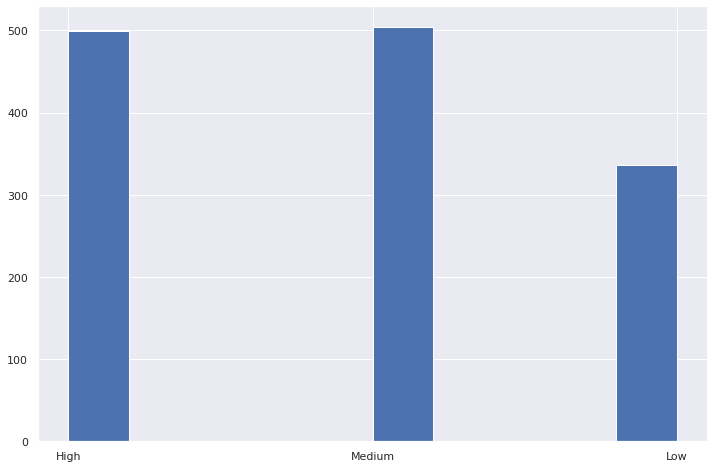

In [85]:
#Set up discretized variable for classification
print(coffee["quality_score"].quantile([0.25,0.5,0.75]))

newLabels = []
for i in coffee["quality_score"]:
  if(i <= 81.08):
    newLabels.append("Low")
  elif (i <= 83):
    newLabels.append("Medium")
  else:
    newLabels.append("High")

coffee["quality_score_disc"] = newLabels
plt.hist(coffee["quality_score_disc"] )

In [86]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(coffee.loc[:, coffee.columns.isin(['Number.of.Bags','Aroma_x', 'Flavor_x', 'Aftertaste_x','Acidity_x', 'Sweetness_x', 'Body_x', 'Uniformity_x', 'Balance_x', 'Moisture_x', 'altitude_mean_meters',])], coffee["quality_score_disc"], test_size=0.3,random_state=810) # 70% training and 30% test

for col in X_train.columns:
  X_train[col].fillna(int(X_train[col].mean()), inplace=True)
  X_test[col].fillna(int(X_test[col].mean()), inplace=True)

In [87]:
#Support Vector Machine Modeling
clf = svm.SVC(kernel='linear') # Linear Kernel

svmStartTime = time.time()

#Train the model using the training sets
clf.fit(X_train, y_train)

svmEndTime = time.time()

svmTotal_time = svmEndTime - svmStartTime


#Predict the response for test dataset
y_pred = clf.predict(X_test)


# Model Accuracy: how often is the classifier correct?
print("Accuracy SVM:",metrics.accuracy_score(y_test, y_pred))

Accuracy SVM: 0.8980099502487562


In [88]:
#Random Forest
rf_model = RandomForestClassifier(n_estimators=50, max_features="auto", random_state=820, max_depth=3)

rfStartTime = time.time()

rf_model.fit(X_train, y_train)

rfEndTime = time.time()

rfTotal_time = rfEndTime - rfStartTime


predictions = rf_model.predict(X_test)
print("Accuracy Random Forest:",metrics.accuracy_score(y_test, predictions))

Accuracy Random Forest: 0.8333333333333334


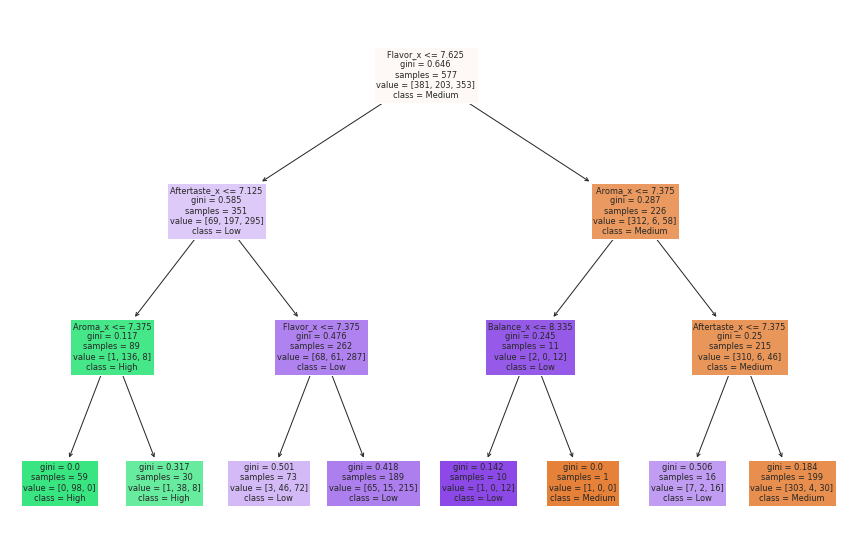

In [89]:
plt.figure(figsize=(15,10))
_ = tree.plot_tree(rf_model.estimators_[0], feature_names=X_train.columns, class_names=list(set(y_train)), filled=True)

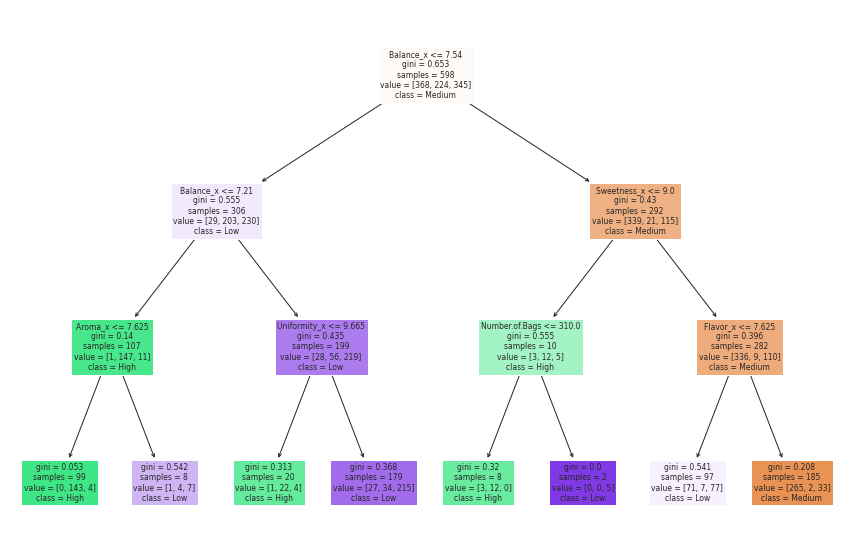

In [90]:
plt.figure(figsize=(15,10))
_ = tree.plot_tree(rf_model.estimators_[49], feature_names=X_train.columns, class_names=list(set(y_train)), filled=True)

In [91]:
#compute time of each model

print("Compute time of OLS: {:.2f} seconds".format(olsTotal_time))
print("Compute time of SVM: {:.2f} seconds".format(svmTotal_time))
print("Compute time of Random Forest: {:.2f} seconds".format(rfTotal_time))

Compute time of OLS: 0.01 seconds
Compute time of SVM: 51.56 seconds
Compute time of Random Forest: 0.09 seconds


In [47]:
#user input
cols = ['Number.of.Bags','Aroma_x', 'Flavor_x', 'Aftertaste_x','Acidity_x', 'Sweetness_x', 'Body_x', 'Uniformity_x', 'Balance_x', 'Moisture_x', 'altitude_mean_meters']
bags = np.mean(coffee["Number.of.Bags"])

print("Please enter scores from 1-10. 10 being the highest\n\n")
aroma = input("How would you rate the Aroma of the coffee bean? (1-10)\n")
flavor = input("How would you rate the Flavor of the coffee bean? (1-10)\n")
aftertaste = input("How would you rate the Aftertaste of the coffee bean? (1-10)\n")
acidity = input("How would you rate the Acidity of the coffee bean? (1-10)\n")
sweetness = input("How would you rate the Sweetness of the coffee bean? (1-10)\n")
body = input("How would you rate the Body (i.e. mouthfeel of the coffee, or the weight/viscosity of the coffee on the tongue) of the coffee bean? (1-10)\n")
uniformity = input("How would you rate the Uniformity (i.e. the particular amount of cups on which you evaluate if elements (acidity, body,etc) shows an stable behavior during the time) of the coffee bean? (1-10)\n")
balance = input("How would you rate the Balance (i.e. coffee that does not localize at any one point on the palate; in other words, it is not imbalanced in the direction of some one (often undesirable) taste characteristic) of the coffee bean? (1-10)\n")
moisture = input("How would you rate the Moisture of the coffee bean? (1-10)\n")
altitude_mean_meters = np.mean(coffee["altitude_mean_meters"])

userdf = {'Number.of.Bags': bags,'Aroma_x': aroma, 'Flavor_x': flavor, 'Aftertaste_x': aftertaste,'Acidity_x': acidity, 'Sweetness_x': sweetness, 'Body_x': body, 'Uniformity_x': uniformity, 'Balance_x': balance, 'Moisture_x': moisture, 'altitude_mean_meters': altitude_mean_meters}

userBean = pd.DataFrame(userdf, index=[0])

print(userBean.head())

Please enter scores from 1-10. 10 being the highest


How would you rate the Aroma of the coffee bean? (1-10)
8
How would you rate the Flavor of the coffee bean? (1-10)
9
How would you rate the Aftertaste of the coffee bean? (1-10)
10
How would you rate the Acidity of the coffee bean? (1-10)
7
How would you rate the Sweetness of the coffee bean? (1-10)
10
How would you rate the Body (i.e. mouthfeel of the coffee, or the weight/viscosity of the coffee on the tongue) of the coffee bean? (1-10)
8
How would you rate the Uniformity (i.e. the particular amount of cups on which you evaluate if elements (acidity, body,etc) shows an stable behavior during the time) of the coffee bean? (1-10)
9
How would you rate the Balance (i.e. coffee that does not localize at any one point on the palate; in other words, it is not imbalanced in the direction of some one (often undesirable) taste characteristic) of the coffee bean? (1-10)
9
How would you rate the Moisture of the coffee bean? (1-10)
10
{'Number

In [53]:
#SVM Model
y_pred = clf.predict(userBean)
print("The quality score of your coffee bean is predicted to be:", y_pred[0], "\n\n")

The quality score of your coffee bean is predicted to be: High 




/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
